# Air pollution's affects on crime rate in major cities
### Method
We write most our function in FUNC.py to test Travis and see the coverage. We import FUCN here to use the function in FUCN, and in this notebook we also have some function that are only useful for part of the analysis.

Air quality index is not varied as tempeture, so we mainly use monthly data in crime-air pollution analysis.

In [1]:
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FUNC

In [2]:
def crime_airpollution_plot(df, city_name):
    """This function is used to draw plot to show trend of crime and AQI
    :param df: a merged dataframe with airpollution and crime data
    :param city_name: a string that indicate the city name, used on the title
    :return: a line plot that shows the trend of crime and AQI
    """
    ax = df.plot(secondary_y=['AQI_mean'],grid=True,figsize=(15,5))
    ax.set_title(city_name+" Crime and AQI")
    ax.set_ylabel('crime_count')
    ax.grid(linestyle="--", alpha=3)
    ax.right_ax.set_ylabel('AQI_mean')
    plt.show()

In [3]:
def crime_airpollution_ols_plot(crime_airpollution_df):
    """This function is used to draw a scatter plot with linear regression line to 
        show correlation between crime and AQI
    :param crime_airpollution_df: a merged dataframe with airpollution and crime data
    :return: a scatter with regression line plot and a regression model
    """
    df_model = ols("crime_count ~ AQI_mean", data=crime_airpollution_df).fit()
    y_fitted = df_model.fittedvalues
    fig, ax = plt.subplots()
    ax.plot(crime_airpollution_df.AQI_mean, crime_airpollution_df.crime_count, 'o', label='data')
    ax.plot(crime_airpollution_df.AQI_mean, y_fitted, 'r--.',label='OLS')
    ax.legend()
    return df_model

In [4]:
airpollution=pd.DataFrame()
airpollution_dir = './daily_aqi_by_cbsa/daily_aqi_by_cbsa_'
for i in range(2012,2018):
    file=FUNC.read_indata(airpollution_dir+str(i)+'.csv')
    airpollution=airpollution.append(file)
airpollution.head()

#extract columns that need to analyze
#airpollution = airpollution[['City', 'Date Local', 'NO2 Mean','NO2 AQI', 'O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']]

#extract columns that need to be analyzed
airpollution = airpollution[['CBSA', 'Date', 'AQI']]

airpollution.head()

,CBSA,Date,AQI
0,"Aberdeen, SD",2012-01-01,10
1,"Aberdeen, SD",2012-01-04,13
2,"Aberdeen, SD",2012-01-08,10
3,"Aberdeen, SD",2012-01-10,13
4,"Aberdeen, SD",2012-01-13,22


In [5]:
#generate year and month
airpollution = FUNC.generate_year_month_day(airpollution, 'Date','month')
airpollution.head()

,CBSA,Date,AQI,year,month
0,"Aberdeen, SD",2012-01-01,10,2012,1
1,"Aberdeen, SD",2012-01-04,13,2012,1
2,"Aberdeen, SD",2012-01-08,10,2012,1
3,"Aberdeen, SD",2012-01-10,13,2012,1
4,"Aberdeen, SD",2012-01-13,22,2012,1


# Hypothesis 2: there exists a correlation between crime and air pollution.

## Chicago crime and air pollution
We first extract and compute the monthly crime count and monthly average air pollution in Chicago to draw a line plot, by drawing this plot, we can have a view of how the crime count and AQI(air quality index) changed between monthes. Here we mainly used pandas to process dataframe and use plot function to draw plots.
This method is also applied in the analysis of the other two city-Los Angeles and New York city.

In [6]:
#extract Chicago data from air pollution file
Chicago_airpollution = FUNC.city_groupby(airpollution, 'CBSA', 'Chicago')
Chicago_airpollution.head()


AQI
                 mean
year month           
2012 1      68.387097
     2      73.551724
     3      76.387097
     4      63.400000
     5      78.290323

In [7]:
#read Chicago crime data
Chicago_crime = FUNC.read_indata('./Chicago_crime_2012-2017.csv')
Chicago_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11002368,JA329407,01/01/2012 12:00:00 AM,021XX N KENNETH AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,31.0,20.0,20,NaN,NaN,2012,11/27/2017 03:53:35 PM,NaN,NaN,NaN
1,9979416,HY169652,01/01/2012 12:00:00 AM,053XX W MONROE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,29.0,25.0,17,1140801.0,1899144.0,2012,02/09/2018 03:44:29 PM,41.879335,-87.758468,"(41.879335159, -87.758467514)"
2,10433124,HZ170983,01/01/2012 12:00:00 AM,026XX N MC VICKER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,True,False,...,29.0,19.0,17,NaN,NaN,2012,05/11/2016 03:48:18 PM,NaN,NaN,NaN
3,9888481,HX538405,01/01/2012 12:00:00 AM,066XX S MAY ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,17.0,68.0,11,1169793.0,1860812.0,2012,02/09/2018 03:44:29 PM,41.773566,-87.653128,"(41.773566189, -87.653127978)"
4,10593543,HZ344934,01/01/2012 12:00:00 AM,064XX W BELLE PLAINE AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,38.0,17.0,17,NaN,NaN,2012,07/12/2016 03:53:40 PM,NaN,NaN,NaN


In [8]:
#count the total number of crime each month from 2012-2017
Chicago_crime_per_month = FUNC.crime_count(Chicago_crime, 'Date', 'month')
Chicago_crime_per_month.head()

count
year month       
2012 1      26265
     2      23869
     3      28561
     4      27178
     5      30088

In [9]:
#merge crime data and month data
Chicago_crime_airpollution = pd.merge(Chicago_airpollution, Chicago_crime_per_month,on=['year','month'])
Chicago_crime_airpollution.columns=['AQI_mean', 'crime_count']
Chicago_crime_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


AQI_mean  crime_count
year month                        
2012 1      68.387097        26265
     2      73.551724        23869
     3      76.387097        28561
     4      63.400000        27178
     5      78.290323        30088

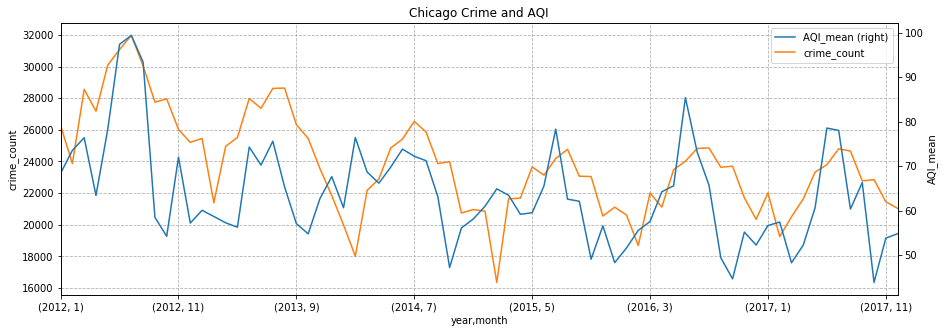

In [10]:
#draw a plot to show the trend of crime and AQI
crime_airpollution_plot(Chicago_crime_airpollution,'Chicago')

This plot shows the fluctuation of monthly crime numbers and monthly average AQI, the x-axis represents the month and year, the left y-axis represents the total crime number in that month, the right y-axis represents the average AQI in that month. 

From the plot we can see the fluctuation of the crime count and the AQI are parellel in some parts, but are totally the opposite, so we assume there might be some connections betweeen the crime count and the AQI in Chicago. While from the line plot we can't see the connection very clearly, we need a futher analysis.

In [11]:
Chicago_crime_airpollution.corr() 

,AQI_mean,crime_count
AQI_mean,1.000000,0.553621
crime_count,0.553621,1.000000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            crime_count   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     30.94
Date:                Sat, 04 May 2019   Prob (F-statistic):           4.56e-07
Time:                        04:53:49   Log-Likelihood:                -667.16
No. Observations:                  72   AIC:                             1338.
Df Residuals:                      70   BIC:                             1343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.431e+04   1748.218      8.185      0.000    1.08e+04    1.78e+04
AQI_mean     149.9422     26.958      5.562      0.000      96.176     203.708
==============================================================================
Omnibus:                        3.974   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.135
Skew:                          -0.410   Prob(JB):                        0.209
Kurtosis:                       3.609   Cond. No.                         371.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

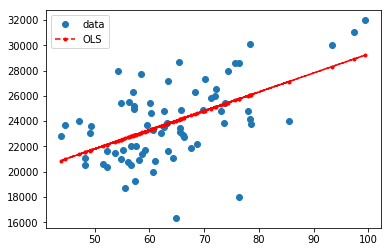

In [12]:
crime_airpollution_ols_plot(Chicago_crime_airpollution).summary()

Apply a linear regression analysis on the monthly crime count and monthly average AQI. 

From the results we can see that the dots are scatter but some of them are close to the red line. It shows a weak linear relationship between Chicago crime and AQI.

## Los Angeles crime and air pollution
We apply the same analysis on Los Angeles.



In [13]:
#extract LA air pollution data
LA_airpollution = FUNC.city_groupby(airpollution, 'CBSA', 'Los Angeles')
LA_airpollution.head()

AQI
                  mean
year month            
2012 1       77.354839
     2       65.896552
     3       63.774194
     4       78.433333
     5      111.741935

In [14]:
#read LA crime data
LA_crime = FUNC.read_indata('./LA_Crime_Data_2010_to_Present.csv')
LA_crime.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,61000673,04/07/2016,04/07/2016,2043,10,West Valley,1037,886,DISTURBING THE PEACE,1501,...,NaN,IC,Invest Cont,886.0,NaN,NaN,NaN,17100 VANOWEN ST,NaN,"(34.1939, -118.5055)"
1,131609876,04/02/2016,04/01/2016,1900,19,Mission,1902,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,...,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,13600 DRONEFIELD AV,NaN,"(34.3196, -118.4561)"
2,150319258,08/20/2016,08/20/2016,30,3,Southwest,325,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,NaN,AO,Adult Other,440.0,NaN,NaN,NaN,2800 MENLO AV,NaN,"(34.0294, -118.2903)"
3,151601466,01/01/2016,01/01/2016,2040,16,Foothill,1642,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0334 0411 1402,...,OTHER KNIFE,AA,Adult Arrest,230.0,998.0,NaN,NaN,10500 CAYUGA AV,NaN,"(34.2606, -118.4238)"
4,151601467,01/02/2016,01/02/2016,30,16,Foothill,1668,624,BATTERY - SIMPLE ASSAULT,0416,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,9800 MARCUS AV,NaN,"(34.2463, -118.2818)"


In [15]:
#count the total number of crime in LA per month
LA_crime_per_month = FUNC.crime_count(LA_crime, 'Date Occurred', 'month')
LA_crime_per_month.head()

count
year month       
2012 1      17745
     2      15316
     3      16562
     4      16275
     5      17466

In [16]:
#merge airpollution data with crime data
LA_crime_airpollution = pd.merge(LA_airpollution, LA_crime_per_month,on=['year','month'])
LA_crime_airpollution.columns=['AQI_mean', 'crime_count']
LA_crime_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


AQI_mean  crime_count
year month                         
2012 1       77.354839        17745
     2       65.896552        15316
     3       63.774194        16562
     4       78.433333        16275
     5      111.741935        17466

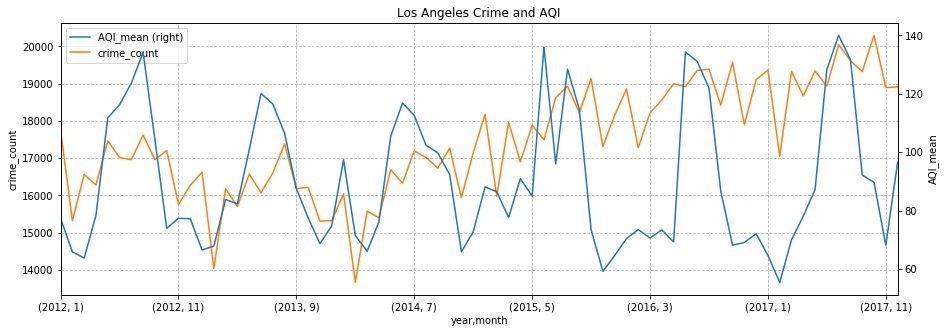

In [17]:
crime_airpollution_plot(LA_crime_airpollution,'Los Angeles')

From this plot we can see that the crime count and AQI almost have the same pace of fluctuation before 2015, but the opposite especially after May 2015. We assume that there might not be a strong relationship between crime count and AQI in Los Angeles.

In [18]:
LA_crime_airpollution.corr() 

,AQI_mean,crime_count
AQI_mean,1.000000,0.246539
crime_count,0.246539,1.000000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            crime_count   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     4.530
Date:                Sat, 04 May 2019   Prob (F-statistic):             0.0368
Time:                        04:54:08   Log-Likelihood:                -623.86
No. Observations:                  72   AIC:                             1252.
Df Residuals:                      70   BIC:                             1256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.605e+04    687.062     23.354      0.000    1.47e+04    1.74e+04
AQI_mean      15.7572      7.403      2.128      0.037       0.992      30.523
==============================================================================
Omnibus:                        3.024   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                1.721
Skew:                          -0.043   Prob(JB):                        0.423
Kurtosis:                       2.248   Cond. No.                         380.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

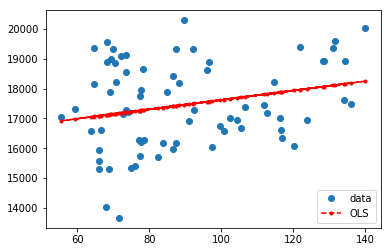

In [19]:
crime_airpollution_ols_plot(LA_crime_airpollution).summary()

From the results we can see that the dots are scatter and most of them are far away from the red line. It hardly shows a linear relationship between LA crime and AQI.

## New York crime and air pollution

In [20]:
#read nyc crime data
NYC_crime = FUNC.read_indata('./NYPD_Complaint_Data_Historic.csv')
NYC_crime.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,236535100,04/20/2010,02:30:00,NaN,NaN,63.0,04/20/2010,578,HARRASSMENT 2,637.0,...,F,NaN,40.636303,-73.919049,"(40.636302737, -73.919048996)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F
1,125657244,04/20/2010,02:15:00,04/20/2010,02:20:00,115.0,04/20/2010,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.750832,-73.874087,"(40.750831801, -73.874087084)",PATROL BORO QUEENS NORTH,NaN,18-24,WHITE HISPANIC,M
2,108722085,04/20/2010,02:00:00,NaN,NaN,48.0,04/20/2010,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.849628,-73.887296,"(40.849628291, -73.887295663)",PATROL BORO BRONX,NaN,25-44,BLACK,F
3,798889672,04/20/2010,02:00:00,04/20/2010,06:30:00,75.0,04/20/2010,107,BURGLARY,213.0,...,NaN,NaN,40.676199,-73.884449,"(40.676198799, -73.884448642)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
4,390790746,04/20/2010,02:00:00,04/20/2010,09:30:00,113.0,04/20/2010,341,PETIT LARCENY,321.0,...,NaN,NaN,40.693635,-73.753149,"(40.693635482, -73.753148571)",PATROL BORO QUEENS SOUTH,NaN,45-64,UNKNOWN,M


In [21]:
#count the total number of crime in NYC per month
NYC_crime_per_month = FUNC.crime_count(NYC_crime, 'RPT_DT', 'month')
NYC_crime_per_month.head()

count
year month       
2012 1      41569
     2      39248
     3      43539
     4      41721
     5      44949

In [22]:
#extract nyc airpollution data 
NYC_airpollution = FUNC.city_groupby(airpollution, 'CBSA', 'New York')
NYC_airpollution.head()

AQI
                 mean
year month           
2012 1      61.000000
     2      56.965517
     3      54.935484
     4      57.000000
     5      65.451613

In [23]:
#merge air pollution data with  crime data
NYC_crime_airpollution = pd.merge(NYC_airpollution, NYC_crime_per_month,on=['year','month'])
NYC_crime_airpollution.columns=['AQI_mean', 'crime_count']
NYC_crime_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


AQI_mean  crime_count
year month                        
2012 1      61.000000        41569
     2      56.965517        39248
     3      54.935484        43539
     4      57.000000        41721
     5      65.451613        44949

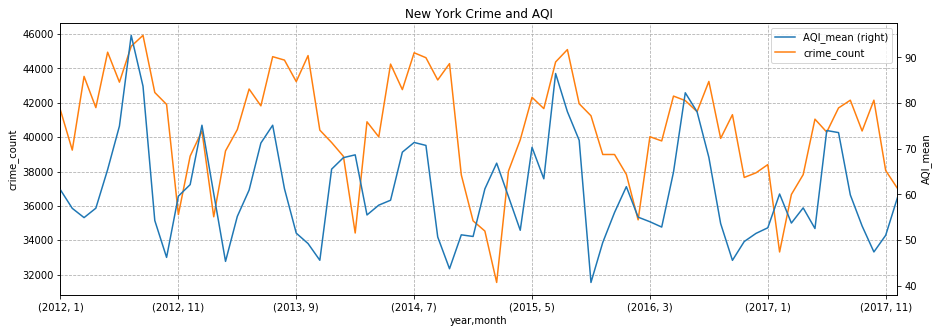

In [24]:
crime_airpollution_plot(NYC_crime_airpollution,'New York')

From this plot we can see that the crime count and AQI have relatively same pace of fluctuation in most parts of plot. We assume that there might be a correlation between crime count and AQI in New York.

In [25]:
NYC_crime_airpollution.corr() 

,AQI_mean,crime_count
AQI_mean,1.000000,0.304485
crime_count,0.304485,1.000000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            crime_count   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     4.530
Date:                Sat, 04 May 2019   Prob (F-statistic):             0.0368
Time:                        04:55:32   Log-Likelihood:                -623.86
No. Observations:                  72   AIC:                             1252.
Df Residuals:                      70   BIC:                             1256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.605e+04    687.062     23.354      0.000    1.47e+04    1.74e+04
AQI_mean      15.7572      7.403      2.128      0.037       0.992      30.523
==============================================================================
Omnibus:                        3.024   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                1.721
Skew:                          -0.043   Prob(JB):                        0.423
Kurtosis:                       2.248   Cond. No.                         380.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

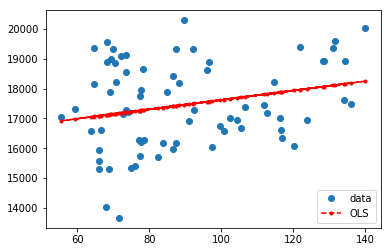

In [26]:
crime_airpollution_ols_plot(LA_crime_airpollution).summary()

From the results we can see that the dots are scatter and most of them are far away from the red line. It also hardly shows a linear relationship between New York crime and AQI.

As a result, among these three city, only Chicago show a weak linear relationship between AQI and crime.

# Hypothesis 3: Air pollution would have different degree of affect on different type of crime.

## Crime Type and Airpollution

Since the crime data from different city have different category. In order to create a general category that could be used in both three city, we calculate the frequency of word in each crime category column from three cities, choosing the most frequent word as a main category name and assign other category to the main category.

Although the total number of crime count show nearly no correlation with crime rate, we still could not eliminate the possiblity that some specific type of crime might still have correlation with AQI. 

Since some study shows that heavier air pollution may affect people's nerual center and cause anger, we assumne that air pollution may have stronger affect on personal crime like assault(including battery) and vandalism than property crime like theft(not including robbery and burglary)/

In [27]:
Chicago_crimetype_word_count = FUNC.crime_type_word_count(Chicago_crime, 'Primary Type')
Chicago_crimetype_word_count.head(10)

THEFT        463603
BATTERY      311011
CRIMINAL     226693
DAMAGE       183242
NARCOTICS    147568
OFFENSE      124562
ASSAULT      118537
OTHER        104568
PRACTICE      97114
DECEPTIVE     97114
dtype: int64

In [28]:
LA_crimetype_word_count = FUNC.crime_type_word_count(LA_crime, 'Crime Code Description')
LA_crimetype_word_count.head(10)

-           1027659
ASSAULT      480755
&            461563
THEFT        453733
VEHICLE      418245
UNDER)       362916
             331038
BURGLARY     303756
SIMPLE       291183
PETTY        270039
dtype: int64

In [29]:
NYC_crimetype_word_count = FUNC.crime_type_word_count(NYC_crime, 'OFNS_DESC')
NYC_crimetype_word_count.head(10)

&              1649038
LARCENY        1617975
RELATED        1245785
PETIT           987329
ASSAULT         849113
OFFENSES        795294
OF              772101
HARRASSMENT     736247
2               736247
CRIMINAL        676929
dtype: int64

In [30]:
#concat word count in crime type of three different cities to show the most frequent word
word_concat = pd.DataFrame(pd.concat([Chicago_crimetype_word_count, LA_crimetype_word_count,NYC_crimetype_word_count]).rename('count'))
word_concat = word_concat.groupby(word_concat.index).agg({'count':'sum'}).sort_values("count", ascending=False)
#clear words that are not relevant to crime type(punctuation, adj)
word_concat.drop(index=['&','-','OF','2','3','','($400','($950','UNDER)','($399','($950.01',
                        'WITH','AND','OVER','ALL','OR','FROM','OTHER','OVER)EXCPT','AGNST','AGAINST',
                        'PETIT','PETTY','SIMPLE','PLAIN','RELATED','GRAND','DANGEROUS','SENSBLTY',
                        'VEHICLE','MOTOR','CHURCH']).head(20)


,count
LARCENY,1617975
ASSAULT,1448405
CRIMINAL,959303
THEFT,920946
OFFENSES,795294
HARRASSMENT,736247
BURGLARY,615889
MISCHIEF,603249
BATTERY,503014
DRUGS,390249


In [31]:
#normalize the crime category in each city
Chicago_crime_withtype = FUNC.normalize_crime_type(Chicago_crime, 'Primary Type')
LA_crime_withtype = FUNC.normalize_crime_type(LA_crime, 'Crime Code Description')
NYC_crime_withtype = FUNC.normalize_crime_type(NYC_crime, 'OFNS_DESC')

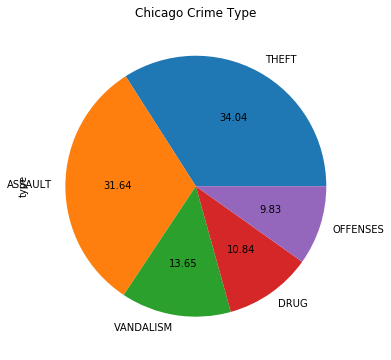

In [32]:
# count the number of crime in different crime type and show top 5
chi_crime_type = Chicago_crime_withtype['type'].value_counts().head(5)
chi_crime_type.plot.pie(figsize=(6, 6),autopct='%.2f',title="Chicago Crime Type")

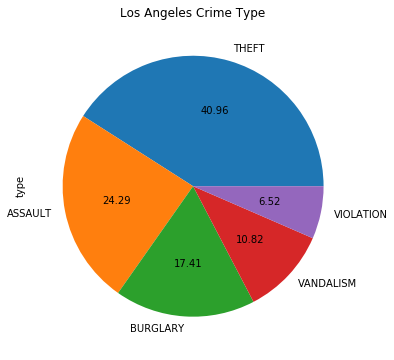

In [33]:
# count the number of crime in different crime type and show top 5
la_crime_type = LA_crime_withtype['type'].value_counts().head(5)
la_crime_type.plot.pie(figsize=(6, 6),autopct='%.2f',title="Los Angeles Crime Type")

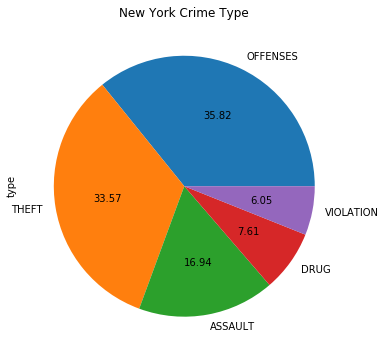

In [34]:
# count the number of crime in different crime type and show top 5
nyc_crime_type = NYC_crime_withtype['type'].value_counts().head(5)
nyc_crime_type.plot.pie(figsize=(6, 6),autopct='%.2f',title="New York Crime Type")

From the three pie charts above, we could see that theft and assault are the most common crime in both three cities. Other than these two, vandalism is very common in Chicago, burglary is more common in Los Angeles and offenses is more common in New York City.

In [35]:
Chicago_crime_per_type = FUNC.crime_count(Chicago_crime_withtype, 'Date', 'type').unstack(level=2).fillna(0)
Chicago_crime_per_type.head()

count                                                            \
type       ASSAULT BURGLARY DECEPTIVE  DRUG HOMICIDE OFFENSES OTHERS ROBBERY   
year month                                                                     
2012 1        5747     1757      1125  3271       40     2039    194    1011   
     2        5402     1398      1002  3581       27     1909    198     696   
     3        7252     1638      1081  3542       53     1950    267     845   
     4        6453     1646      1082  3027       39     1825    173     975   
     5        7917     1924      1079  3068       50     1957    137    1267   

                                      
type       THEFT VANDALISM VIOLATION  
year month                            
2012 1      7153      2699      1229  
     2      6038      2373      1245  
     3      7292      3184      1457  
     4      7525      3129      1304  
     5      7928      3313      1448

In [36]:
Chicago_crimetype_airpollution = pd.merge(Chicago_crime_per_type,Chicago_airpollution,on=['year','month'])
Chicago_crimetype_airpollution.corr().tail(1)

count                                                    \
type       ASSAULT  BURGLARY DECEPTIVE      DRUG  HOMICIDE  OFFENSES   
    type                                                               
AQI mean  0.575547  0.383331 -0.320622  0.421797  0.140627  0.303527   

                                                           AQI  
type        OTHERS   ROBBERY    THEFT VANDALISM VIOLATION mean  
    type                                                        
AQI mean  0.443828  0.155589  0.43065  0.430494  0.524237  1.0

When choosing the crime type we want to analyze, we have the following condition:
1. Crime type that are common in both three cities to better compare data and show difference between major cities.
2. Crime type that are common (at least top 5) in its own city.
3. Type that have relatively high correlation with AQI.

To meet the three conditions, for Chicago, we choose 'THEFT', 'ASSAULT' and 'VANDALISM'.

In [37]:
Chicago_crimetype_airpollution = pd.merge(Chicago_crime_per_type['count'][['THEFT', 'ASSAULT','VANDALISM']],Chicago_airpollution,on=['year','month'])
Chicago_crimetype_airpollution.columns=['THEFT', 'ASSAULT','VANDALISM','AQI_mean']
Chicago_crimetype_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


THEFT  ASSAULT  VANDALISM   AQI_mean
year month                                      
2012 1       7153     5747       2699  68.387097
     2       6038     5402       2373  73.551724
     3       7292     7252       3184  76.387097
     4       7525     6453       3129  63.400000
     5       7928     7917       3313  78.290323

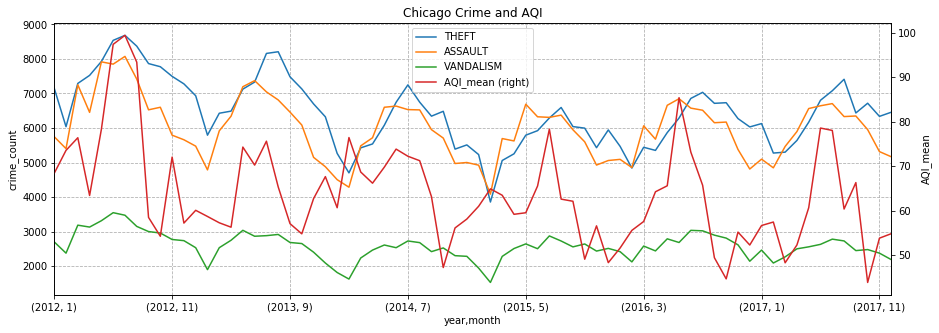

In [38]:
crime_airpollution_plot(Chicago_crimetype_airpollution,'Chicago')

From this plot we can see that the fluctuation of the AQI and the count of theft, assault are in similar pace, but vadalism is the opposite. The correlation table shows that correlation between ASSAULT and AQI (0.575547) does stronger than THEFT(0.43065).

In [39]:
LA_crime_per_type = FUNC.crime_count(LA_crime_withtype, 'Date Occurred', 'type').unstack(level=2).fillna(0)
LA_crime_per_type.head()

count                                                \
type       ABORTION/ILLEGAL ASSAULT BIGAMY BLOCKING DOOR INDUCTION CENTER   
year month                                                                  
2012 1                  0.0  3312.0    1.0                            0.0   
     2                  0.0  3101.0    0.0                            0.0   
     3                  0.0  3395.0    0.0                            0.0   
     4                  0.0  3451.0    1.0                            0.0   
     5                  0.0  3932.0    0.0                            0.0   

                                                                    ...  \
type       BRIBERY BURGLARY CONSPIRACY CONTRIBUTING DECEPTIVE DRUG  ...   
year month                                                          ...   
2012 1         0.0   3040.0        0.0          1.0      22.0  0.0  ...   
     2         1.0   2480.0        0.0          1.0      13.0  0.0  ...   
     3         0.0   2720.0        1.0          0.0      24.0  0.0  ...   
     4         1.0   2616.0        0.0          6.0      15.0  0.0  ...   
     5         1.0   2782.0        1.0          4.0      14.0  0.0  ...   

                                                                              \
type       HOMICIDE INCITING A RIOT LYNCHING OFFENSES OTHERS ROBBERY   THEFT   
year month                                                                     
2012 1         39.0             0.0      1.0    578.0  738.0   747.0  6741.0   
     2         19.0             0.0      3.0    616.0  509.0   607.0  5643.0   
     3         18.0             0.0      0.0    575.0  583.0   766.0  5921.0   
     4         24.0             0.0      1.0    633.0  518.0   706.0  5809.0   
     5         24.0             0.0      0.0    691.0  527.0   788.0  6107.0   

                                                                
type       TILL TAP - PETTY ($950 & UNDER) VANDALISM VIOLATION  
year month                                                      
2012 1                                 1.0    1639.0     885.0  
     2                                 0.0    1473.0     850.0  
     3                                 1.0    1625.0     933.0  
     4                                 0.0    1577.0     917.0  
     5                                 1.0    1698.0     895.0  

[5 rows x 22 columns]

In [40]:
LA_crimetype_airpollution = pd.merge(LA_crime_per_type,LA_airpollution,on=['year','month'])
LA_crimetype_airpollution.corr().tail(1)

count                                                     \
type     ABORTION/ILLEGAL   ASSAULT    BIGAMY BLOCKING DOOR INDUCTION CENTER   
    type                                                                       
AQI mean        -0.032441  0.454033  0.050907                       0.035983   

                                                                          ...  \
type       BRIBERY  BURGLARY CONSPIRACY CONTRIBUTING DECEPTIVE      DRUG  ...   
    type                                                                  ...   
AQI mean -0.046762 -0.072177  -0.048914     -0.08389 -0.176413  0.048922  ...   

                                                                            \
type     INCITING A RIOT  LYNCHING  OFFENSES    OTHERS   ROBBERY     THEFT   
    type                                                                     
AQI mean        0.115424 -0.064177  0.485515  0.115964  0.232779  0.045826   

                                                              AQI  
type     TILL TAP - PETTY ($950 & UNDER) VANDALISM VIOLATION mean  
    type                                                           
AQI mean                        0.050399  0.313516  0.239837  1.0  

[1 rows x 23 columns]

To meet the three conditions above, for Los Angeles, we choose 'THEFT', 'ASSAULT' and 'VIOLATION'.

In [41]:
LA_crimetype_airpollution = pd.merge(LA_crime_per_type['count'][['THEFT', 'ASSAULT','VIOLATION']],LA_airpollution,on=['year','month'])
LA_crimetype_airpollution.columns=['THEFT', 'ASSAULT','VIOLATION','AQI_mean']
LA_crimetype_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


THEFT  ASSAULT  VIOLATION    AQI_mean
year month                                        
2012 1      6741.0   3312.0      885.0   77.354839
     2      5643.0   3101.0      850.0   65.896552
     3      5921.0   3395.0      933.0   63.774194
     4      5809.0   3451.0      917.0   78.433333
     5      6107.0   3932.0      895.0  111.741935

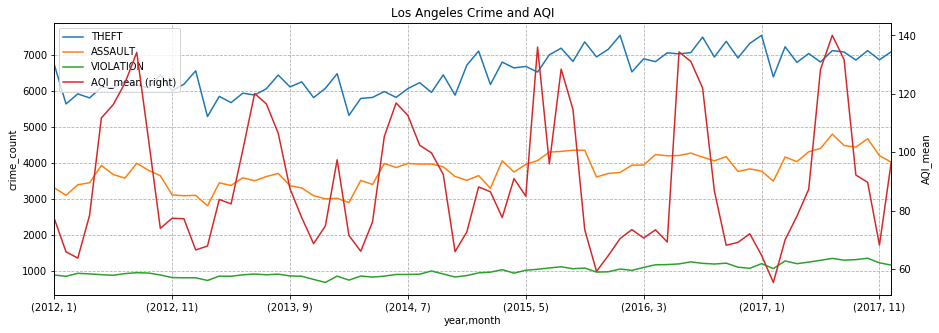

In [42]:
crime_airpollution_plot(LA_crimetype_airpollution,'Los Angeles')

From this plot we can see that the fluctuation of the AQI is pretty large but the fluctuation of both three types of crime are small. However, the correlation table shows that correlation between ASSAULT and AQI (0.454033) does stronger than THEFT(0.045826).

In [43]:
NYC_crime_per_type = FUNC.crime_count(NYC_crime_withtype, 'RPT_DT', 'type').unstack(level=2).fillna(0)
NYC_crime_per_type.head()

count                                                          \
type       ABORTION ASSAULT BURGLARY DECEPTIVE    DRUG ENDAN WELFARE INCOMP   
year month                                                                    
2012 1          0.0  5547.0   1674.0     656.0  3325.0                  1.0   
     2          0.0  5581.0   1375.0     761.0  3151.0                  2.0   
     3          0.0  6528.0   1395.0     777.0  3369.0                  0.0   
     4          0.0  6383.0   1432.0     754.0  3004.0                  4.0   
     5          0.0  7035.0   1643.0     719.0  3182.0                  3.0   

                                                                       \
type       FORTUNE TELLING HOMICIDE OFFENSES  OTHERS ROBBERY    THEFT   
year month                                                              
2012 1                 0.0     37.0  12500.0  1614.0  1736.0  11309.0   
     2                 0.0     30.0  11550.0  1554.0  1360.0  10700.0   
     3                 0.0     40.0  13268.0  1823.0  1478.0  11659.0   
     4                 0.0     37.0  12525.0  1716.0  1475.0  11344.0   
     5                 0.0     37.0  13215.0  1801.0  1741.0  12558.0   

                                
type       VANDALISM VIOLATION  
year month                      
2012 1         634.0    2398.0  
     2         675.0    2362.0  
     3         712.0    2319.0  
     4         695.0    2198.0  
     5         638.0    2210.0

In [44]:
NYC_crimetype_airpollution = pd.merge(NYC_crime_per_type,NYC_airpollution,on=['year','month'])
NYC_crimetype_airpollution.corr().tail(1)

count                                          \
type      ABORTION   ASSAULT  BURGLARY DECEPTIVE      DRUG   
    type                                                     
AQI mean  0.066032  0.476716  0.176417 -0.217365  0.122562   

                                                                             \
type     ENDAN WELFARE INCOMP FORTUNE TELLING  HOMICIDE  OFFENSES    OTHERS   
    type                                                                      
AQI mean             0.113541        0.408376  0.386428  0.240208  0.205929   

                                                 AQI  
type       ROBBERY    THEFT VANDALISM VIOLATION mean  
    type                                              
AQI mean  0.206553  0.23381 -0.070091  0.076991  1.0

To meet the three conditions above, for Los Angeles, we choose 'THEFT', 'ASSAULT' and 'OFFENSES'.

In [45]:
NYC_crimetype_airpollution = pd.merge(NYC_crime_per_type['count'][['THEFT', 'ASSAULT','OFFENSES']],NYC_airpollution,on=['year','month'])
NYC_crimetype_airpollution.columns=['THEFT', 'ASSAULT','OFFENSES','AQI_mean']
NYC_crimetype_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


THEFT  ASSAULT  OFFENSES   AQI_mean
year month                                       
2012 1      11309.0   5547.0   12500.0  61.000000
     2      10700.0   5581.0   11550.0  56.965517
     3      11659.0   6528.0   13268.0  54.935484
     4      11344.0   6383.0   12525.0  57.000000
     5      12558.0   7035.0   13215.0  65.451613

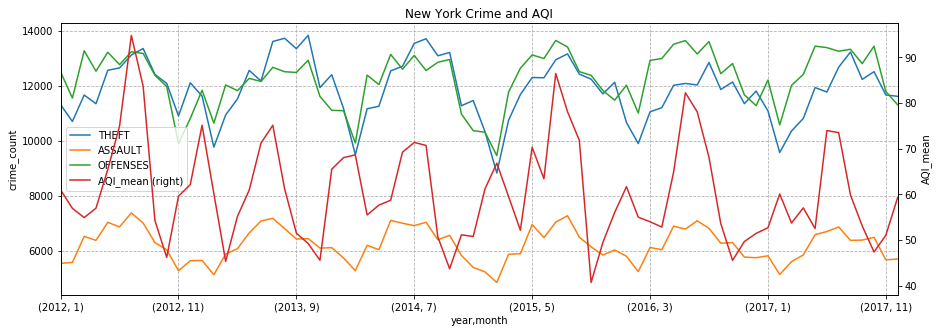

In [46]:
crime_airpollution_plot(NYC_crimetype_airpollution,'New York')

From this plot we can see that the fluctuation of the AQI and the count of theft, assault and offenses are in similar pace. The correlation table shows that correlation between ASSAULT and AQI (0.476716) does stronger than THEFT(0.23381).